In [1]:
import pandas as pd

In [2]:
url = "https://opendata.arcgis.com/datasets/b913e9591eae4912b33dc5b4e88646c5_10.csv"#?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D"
full_df = pd.read_csv(url)


In [3]:
from datetime import datetime
def _get_date(x):
    y, m, d = x.split("/")
    d, _ = d.split(" ")
    return datetime(int(y), int(m), int(d))

df = full_df.fillna(0).replace({-999: 0, -888: 0})
df = df[df.NAME == "WI"].copy()
df["datetime"] = df["DATE"].apply(_get_date)

ignore = [
    'POS_AIAN', 'POS_ASN', 'POS_BLK', 'POS_WHT', 'POS_MLTOTH', 'POS_UNK',
       'POS_E_HSP', 'POS_E_NHSP', 'POS_E_UNK', 'DTH_AIAN', 'DTH_ASN',
       'DTH_BLK', 'DTH_WHT', 'DTH_MLTOTH', 'DTH_UNK', 'DTH_E_HSP',
       'DTH_E_NHSP', 'DTH_E_UNK', 'POS_HC_Y', 'POS_HC_N', 'POS_HC_UNK',
       'DTH_NEW', 'POS_NEW', 'NEG_NEW', 'TEST_NEW',
    "POS_FEM", "POS_MALE", "POS_OTH", "DTHS_FEM", "DTHS_MALE", "DTHS_OTH",
    "OBJECTID", "GEOID", "GEO", "NAME", "LoadDttm", "DATE",
]
df = df.drop(columns=ignore)

df.head()

,NEGATIVE,POSITIVE,HOSP_YES,HOSP_NO,HOSP_UNK,POS_0_9,POS_10_19,POS_20_29,POS_30_39,POS_40_49,...,IC_Y_10_19,IC_Y_20_29,IC_Y_30_39,IC_Y_40_49,IC_Y_50_59,IC_Y_60_69,IC_Y_70_79,IC_Y_80_89,IC_Y_90,datetime
0,313.0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-03-15
73,504.0,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-03-16
146,1038.0,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-03-17
584,403447.0,22932,3061.0,13262.0,6609.0,703.0,1657.0,4403.0,4168.0,3735.0,...,3.0,21.0,35.0,83.0,121.0,187.0,136.0,64.0,28.0,2020-06-15
1010,414330.0,23198,3096.0,13478.0,6624.0,713.0,1684.0,4480.0,4216.0,3761.0,...,3.0,22.0,35.0,83.0,124.0,189.0,136.0,66.0,27.0,2020-06-16


Description of data:  https://www.dhs.wisconsin.gov/publications/p02677.pdf

Notably, numbers are *cumulative.* All numbers below are agres 50 to 59.

`IP_{Y, N, U}_50_59`: positive and {were hospitalized, were not hospitalized, unknown}.

`IC_{Y, N, U}_50_59`: positive and {were in ICU, were not not in ICU, unknown}.

`DTHS_50_59`: died from COVID.

`POS_50_59`: tested positive.

Plan:

Columns:

* Age range.
* Date.
* positive, deaths, hospitalized, icu.
* Negative, positive, hosp status, deaths


In [4]:
df.columns

Index(['NEGATIVE', 'POSITIVE', 'HOSP_YES', 'HOSP_NO', 'HOSP_UNK', 'POS_0_9',
       'POS_10_19', 'POS_20_29', 'POS_30_39', 'POS_40_49', 'POS_50_59',
       'POS_60_69', 'POS_70_79', 'POS_80_89', 'POS_90', 'DEATHS', 'DTHS_0_9',
       'DTHS_10_19', 'DTHS_20_29', 'DTHS_30_39', 'DTHS_40_49', 'DTHS_50_59',
       'DTHS_60_69', 'DTHS_70_79', 'DTHS_80_89', 'DTHS_90', 'IP_Y_0_9',
       'IP_Y_10_19', 'IP_Y_20_29', 'IP_Y_30_39', 'IP_Y_40_49', 'IP_Y_50_59',
       'IP_Y_60_69', 'IP_Y_70_79', 'IP_Y_80_89', 'IP_Y_90', 'IP_N_0_9',
       'IP_N_10_19', 'IP_N_20_29', 'IP_N_30_39', 'IP_N_40_49', 'IP_N_50_59',
       'IP_N_60_69', 'IP_N_70_79', 'IP_N_80_89', 'IP_N_90', 'IP_U_0_9',
       'IP_U_10_19', 'IP_U_20_29', 'IP_U_30_39', 'IP_U_40_49', 'IP_U_50_59',
       'IP_U_60_69', 'IP_U_70_79', 'IP_U_80_89', 'IP_U_90', 'IC_YES',
       'IC_Y_0_9', 'IC_Y_10_19', 'IC_Y_20_29', 'IC_Y_30_39', 'IC_Y_40_49',
       'IC_Y_50_59', 'IC_Y_60_69', 'IC_Y_70_79', 'IC_Y_80_89', 'IC_Y_90',
       'datetime'],
      dtyp

In [5]:
df.columns

Index(['NEGATIVE', 'POSITIVE', 'HOSP_YES', 'HOSP_NO', 'HOSP_UNK', 'POS_0_9',
       'POS_10_19', 'POS_20_29', 'POS_30_39', 'POS_40_49', 'POS_50_59',
       'POS_60_69', 'POS_70_79', 'POS_80_89', 'POS_90', 'DEATHS', 'DTHS_0_9',
       'DTHS_10_19', 'DTHS_20_29', 'DTHS_30_39', 'DTHS_40_49', 'DTHS_50_59',
       'DTHS_60_69', 'DTHS_70_79', 'DTHS_80_89', 'DTHS_90', 'IP_Y_0_9',
       'IP_Y_10_19', 'IP_Y_20_29', 'IP_Y_30_39', 'IP_Y_40_49', 'IP_Y_50_59',
       'IP_Y_60_69', 'IP_Y_70_79', 'IP_Y_80_89', 'IP_Y_90', 'IP_N_0_9',
       'IP_N_10_19', 'IP_N_20_29', 'IP_N_30_39', 'IP_N_40_49', 'IP_N_50_59',
       'IP_N_60_69', 'IP_N_70_79', 'IP_N_80_89', 'IP_N_90', 'IP_U_0_9',
       'IP_U_10_19', 'IP_U_20_29', 'IP_U_30_39', 'IP_U_40_49', 'IP_U_50_59',
       'IP_U_60_69', 'IP_U_70_79', 'IP_U_80_89', 'IP_U_90', 'IC_YES',
       'IC_Y_0_9', 'IC_Y_10_19', 'IC_Y_20_29', 'IC_Y_30_39', 'IC_Y_40_49',
       'IC_Y_50_59', 'IC_Y_60_69', 'IC_Y_70_79', 'IC_Y_80_89', 'IC_Y_90',
       'datetime'],
      dtyp

In [6]:
import numpy as np

summary = df[["NEGATIVE", "POSITIVE", "HOSP_YES", "HOSP_NO", "HOSP_UNK", "DEATHS", "IC_YES", "datetime"]].copy()
summary = summary.groupby("datetime").mean()
summary.sort_values(by="datetime", inplace=True)
summary["death_rate"] = summary["DEATHS"] / summary["POSITIVE"]
summary["hosp_rate"] = summary["HOSP_YES"] / summary["POSITIVE"]
summary["icu_rate"] = summary["IC_YES"] / summary["POSITIVE"]
summary["illness_rate"] = summary["POSITIVE"] / (summary["POSITIVE"] + summary["NEGATIVE"])

Source for common cold data: https://www.cdc.gov/flu/about/burden/2018-2019.html

In [7]:
flu = {
    "illness": (5861.40, (3831.5, 11502.1)),
    "medical_visit": (3282.40, (2093.2, 6457.1)),
    "hosp": (532.9, (348.3, 1045.6)),
    "death": (48.7, (34.1, 78.9)),
}

for name, (est, (lb, ub)) in flu.items():
    flu[name] = (est / 100e3, (lb / 100e3, ub / 100e3))

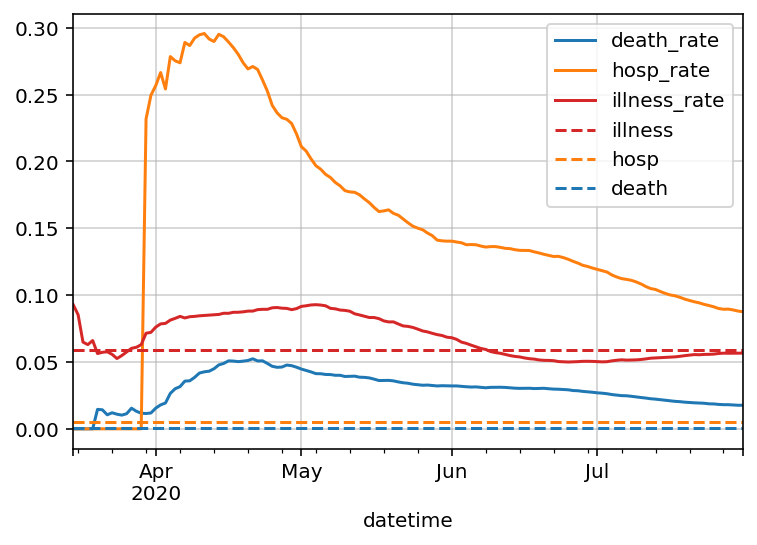

In [8]:
# ax = summary.plot(y=["death_rate", "hosp_rate", "icu_rate", "illness_rate"])
ax = summary.plot(
    y=["death_rate", "hosp_rate", "illness_rate"],
    color=["C0", "C1", "C3"],
)
ax.grid(alpha=0.6)

colors = {
    "death": "C0",
    "hosp": "C1",
    "icu": "C2",
    "illness": "C3",
}
for name, (est, (lb, ub)) in flu.items():
    if "visit" in name:
        continue
    ax.plot(ax.get_xlim(), [est, est], colors[name] + "--", label=name)
#     ax.fill_between(ax.get_xlim(), [lb, lb], [ub, ub], label=name)
ax.legend(loc="best")

# ax.set_yscale("log")

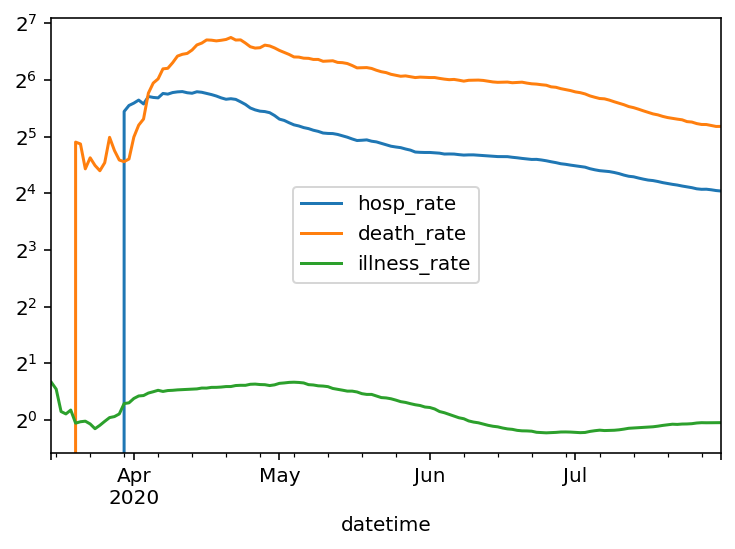

In [9]:
relative = summary.copy()
relative["hosp_rate"] /= flu["hosp"][0]
relative["death_rate"] /= flu["death"][0]
relative["illness_rate"] /= flu["illness"][0]
ax = relative.plot(y=["hosp_rate", "death_rate", "illness_rate"])
ax.set_yscale("log", basey=2)

Look at this plot *per age.*

* x: age
* y: relative cost to flu.
* color: hosp/death/illness.

In [10]:
d = df.drop(columns=["NEGATIVE", "POSITIVE", "HOSP_YES", "HOSP_NO", "HOSP_UNK", "DEATHS", "IC_YES"]).melt(id_vars="datetime")
d["variable"] = d["variable"].apply(lambda x: x + "_99" if "_90" in x else x)

d["age"] = d["variable"].apply(lambda x: int(x.split("_")[-2]))
assert np.allclose(d["age"] % 10, 0)
d["variable"] = d["variable"].apply(lambda x: "_".join(x.split("_")[:-2]))
d.head()

,datetime,variable,value,age
0,2020-03-15,POS,0.0,0
1,2020-03-16,POS,0.0,0
2,2020-03-17,POS,0.0,0
3,2020-06-15,POS,703.0,0
4,2020-06-16,POS,713.0,0


In [11]:
d.loc[d.variable == "POS", "variable"] = "positive"
d.loc[d.variable == "DTHS", "variable"] = "dead"
d.loc[d.variable == "IC_Y", "variable"] = "icu_admit"
d.loc[d.variable == "IC_N", "variable"] = "icu_never"
d.loc[d.variable == "IC_U", "variable"] = "icu_unknown"
d.loc[d.variable == "IP_Y", "variable"] = "hosp_admit"
d.loc[d.variable == "IP_N", "variable"] = "hosp_never"
d.loc[d.variable == "IP_U", "variable"] = "hosp_unknown"
d.head()

,datetime,variable,value,age
0,2020-03-15,positive,0.0,0
1,2020-03-16,positive,0.0,0
2,2020-03-17,positive,0.0,0
3,2020-06-15,positive,703.0,0
4,2020-06-16,positive,713.0,0


In [62]:
date = d["datetime"].max()
final_vals = d[d["datetime"] == date]
covid = final_vals.pivot_table(
    index="age",
    values="value",
    columns="variable",
)
covid["death_rate"] = covid["dead"] / covid["positive"]
covid["hosp_admit_rate"] = covid["hosp_admit"] / covid["positive"]
covid["icu_rate"] = covid["icu_admit"] / covid["positive"]

covid["max_age"] = covid.index + 10
covid["min_age"] = covid.index + 0
covid["virus"] = "covid"

Look at death and hospitalization rates.

From table 2 of https://www.cdc.gov/flu/about/burden/2018-2019.html:

In [63]:
with open("cdc-flu-rates-estimate.html", "r") as f:
    flu = pd.read_html(f)[0]
flu = flu.set_index(("Unnamed: 0_level_0", "Age group"))
flu.index.name = "Age group"
uniq_cols = list({name for name, descriptor in flu.columns})
show_cols = [(c, "Estimate") for c in uniq_cols]
flu = flu[show_cols]
flu.columns = uniq_cols
flu.columns = ["med_visit_rate", "hosp_admit_rate", "death_rate", "illness_rate"]
flu /= 100e3
assert (flu.index == ['0-4 yrs', '5-17 yrs', '18-49 yrs', '50-64 yrs', '65+ yrs']).all()
flu["max_age"] = [5, 17, 49, 64, 100]
flu["min_age"] = [0, 5, 18, 50, 65]
flu = flu.reset_index()
flu["virus"] = "flu"
flu

,Age group,med_visit_rate,hosp_admit_rate,death_rate,illness_rate,max_age,min_age,virus
0,0-4 yrs,0.183395,0.122875,0.000013,0.001279,5,0,flu
1,5-17 yrs,0.143001,0.074361,0.000004,0.000392,17,5,flu
2,18-49 yrs,0.086215,0.031900,0.000018,0.000484,49,18,flu
3,50-64 yrs,0.146271,0.062896,0.000090,0.001551,64,50,flu
4,65+ yrs,0.058614,0.032824,0.000487,0.005329,100,65,flu


In [64]:
cols = ["min_age", "max_age", "hosp_admit_rate", "death_rate", "virus"]
show = pd.concat((flu, covid))[cols]
show = show.melt(id_vars=["min_age", "max_age", "virus"], value_name="fraction")
show.head()

,min_age,max_age,virus,variable,fraction
0,0,5,flu,hosp_admit_rate,0.122875
1,5,17,flu,hosp_admit_rate,0.074361
2,18,49,flu,hosp_admit_rate,0.031900
3,50,64,flu,hosp_admit_rate,0.062896
4,65,100,flu,hosp_admit_rate,0.032824


Text(0.5, 0, 'Age')

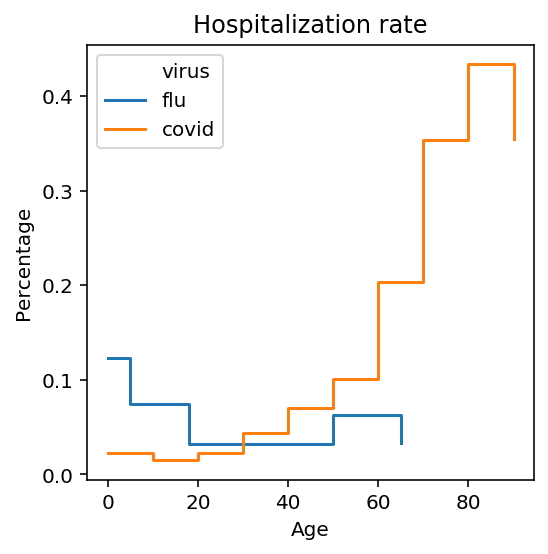

In [72]:
import matplotlib.pyplot as plt

w = 4
fig, ax = plt.subplots(ncols=1, figsize=(w, w))

import seaborn as sns
ax = sns.lineplot(
    x="min_age",
    y="fraction",
    hue="virus",
    data=show[show.variable == "hosp_admit_rate"],
    ax=ax,
    drawstyle="steps-post",
)
ax.set_title("Hospitalization rate")
ax.set_ylabel("Percentage")
ax.set_xlabel("Age")
# ax.set_yscale("log", basey=2)

In [ ]:
import matplotlib.pyplot as plt

w = 4
fig, ax = plt.subplots(ncols=1, figsize=(w, w))

import seaborn as sns
ax = sns.lineplot(
    x="min_age",
    y="fraction",
    hue="virus",
    data=show[show.variable == "death_rate"],
    ax=ax,
    drawstyle="steps-post",
)
ax.set_title("Death rate")
ax.set_ylabel("Percentage")
ax.set_xlabel("Age")
ax.set_yscale("log", basey=10)

In [37]:
import altair as alt
kwargs = dict(
    x="max_age",
    color="virus",
)
alt.Chart(show).mark_line(interpolate='step-after').encode(
    x="max_age",
    y=alt.Y("fraction"),#, scale=alt.Scale(type="log")),
    color="virus",
    column="variable",
)

alt.Chart(...)

WI population pyramid: https://worldpopulationreview.com/states/wisconsin-population

https://data.census.gov/cedsci/table?tid=ACSST5Y2018.S0101&g=0400000US55

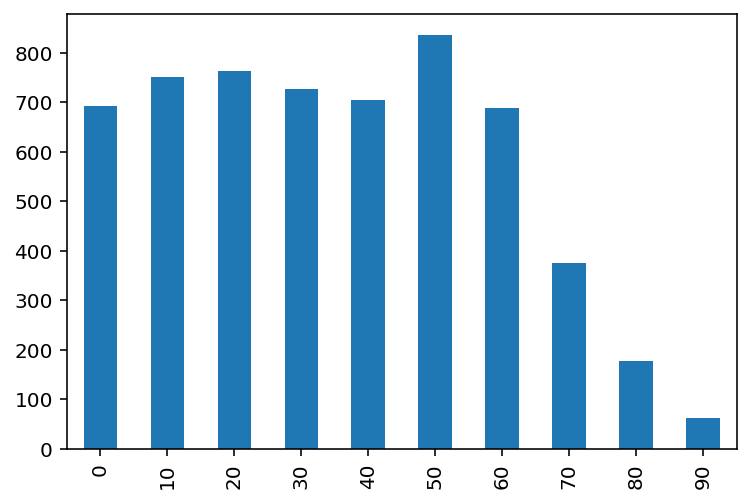

In [66]:
wi = {
    0: 335.9 + 357.7,
    10: 370.49 + 381.1,
    20: 402.2 + 361.46,
    30: 368.4 + 358.16,
    40: 338.2 + 365.8,
    50: 411.8 + 424.779,
    60: 379.49 + 308.941,
    70: 218.4 + 156.6,
    80: 114.686 + 126.0 / 2,
    90: 126.0 / 2,
}

In [43]:
# dead / positive
# in_hosp / positive
# in_icu / positive
# positive / wi_population

In [44]:
show.columns

MultiIndex([(        'dead',  0),
            (        'dead', 10),
            (        'dead', 20),
            (        'dead', 30),
            (        'dead', 40),
            (        'dead', 50),
            (        'dead', 60),
            (        'dead', 70),
            (        'dead', 80),
            (        'dead', 90),
            (  'hosp_admit',  0),
            (  'hosp_admit', 10),
            (  'hosp_admit', 20),
            (  'hosp_admit', 30),
            (  'hosp_admit', 40),
            (  'hosp_admit', 50),
            (  'hosp_admit', 60),
            (  'hosp_admit', 70),
            (  'hosp_admit', 80),
            (  'hosp_admit', 90),
            (  'hosp_never',  0),
            (  'hosp_never', 10),
            (  'hosp_never', 20),
            (  'hosp_never', 30),
            (  'hosp_never', 40),
            (  'hosp_never', 50),
            (  'hosp_never', 60),
            (  'hosp_never', 70),
            (  'hosp_never', 80),
            ( 